#Computer Vision Project : 5xModels

#1_ Masked Face Classification With Image Augmentation

##Graphics

In [ ]:
!nvidia-smi

Mon Feb  1 21:37:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Copy Dataset to Content
This process will decrease the runtime and make the training very fast.

In [ ]:
%cp -R /content/drive/MyDrive/Face_Masked_Dataset/ /content/

# Importing packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

## Understanding our data

In [ ]:
num_faces_tr = len(os.listdir('/content/Face_Masked_Dataset/Train/Faces'))
num_masked_tr = len(os.listdir('/content/Face_Masked_Dataset/Train/Masked'))

num_faces_val = len(os.listdir('/content/Face_Masked_Dataset/validation/Faces'))
num_masked_val = len(os.listdir('/content/Face_Masked_Dataset/validation/Masked'))

total_train = num_faces_tr + num_masked_tr
total_val = num_faces_val + num_masked_val

In [ ]:
print('total training Faces images:', num_faces_tr)
print('total training masked images:', num_masked_tr)

print('total validation faces images:', num_faces_val)
print('total validation masked images:', num_masked_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Faces images: 1709
total training masked images: 1930
total validation faces images: 304
total validation masked images: 300
--
Total training images: 3639
Total validation images: 604


# Setting Model Parameters

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 120  # Our training data consists of images with width of 120 pixels and height of 150 pixels

# Data Preparation 

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='/content/Face_Masked_Dataset/Train',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(120,120)
                                                           class_mode='binary')

Found 3639 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory='/content/Face_Masked_Dataset/validation',
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 604 images belonging to 2 classes.


### Visualizing Training images

In [ ]:
sample_training_images, _ = next(train_data_gen) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

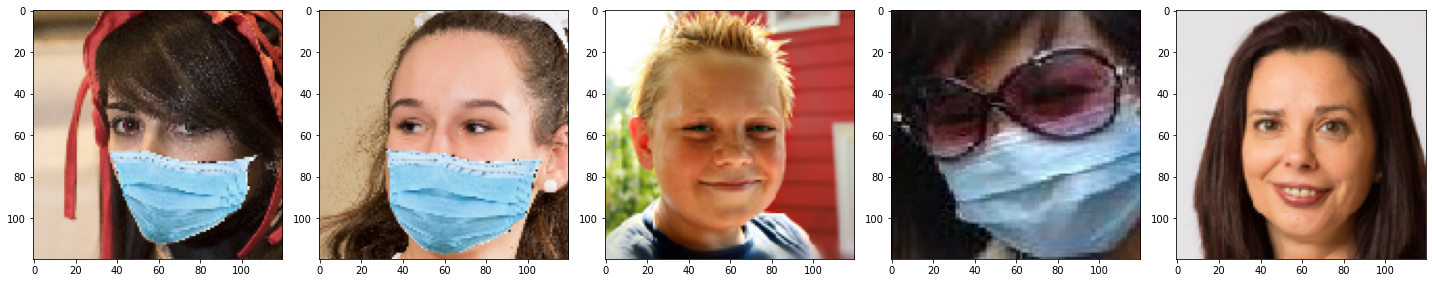

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

#Data Augmentation

## Flipping

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Face_Masked_Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 3639 images belonging to 2 classes.


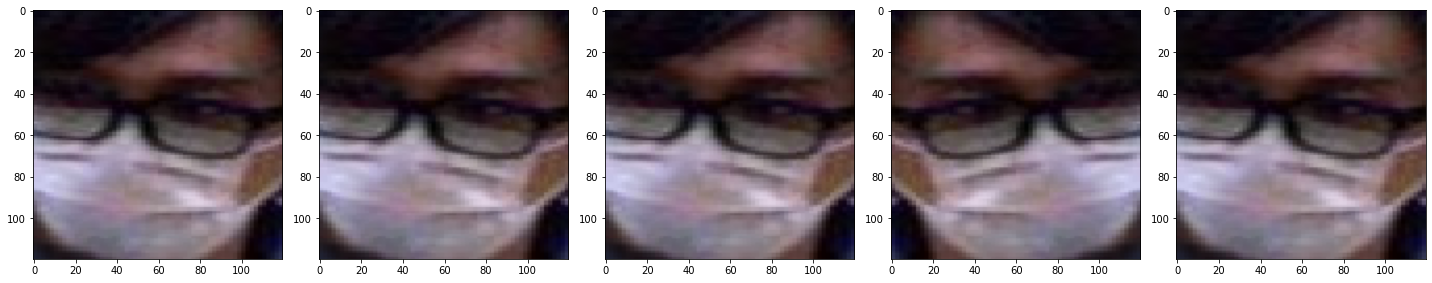

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##Rotation

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Face_Masked_Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3639 images belonging to 2 classes.


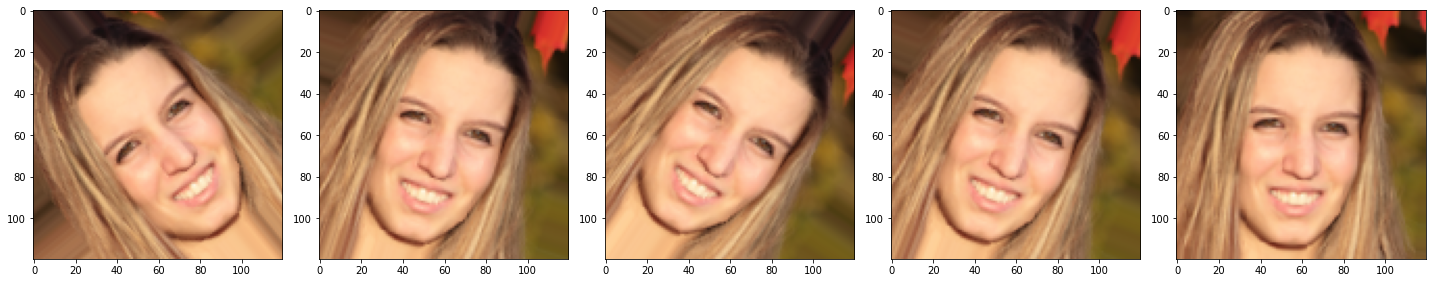

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##Zooming

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Face_Masked_Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3639 images belonging to 2 classes.


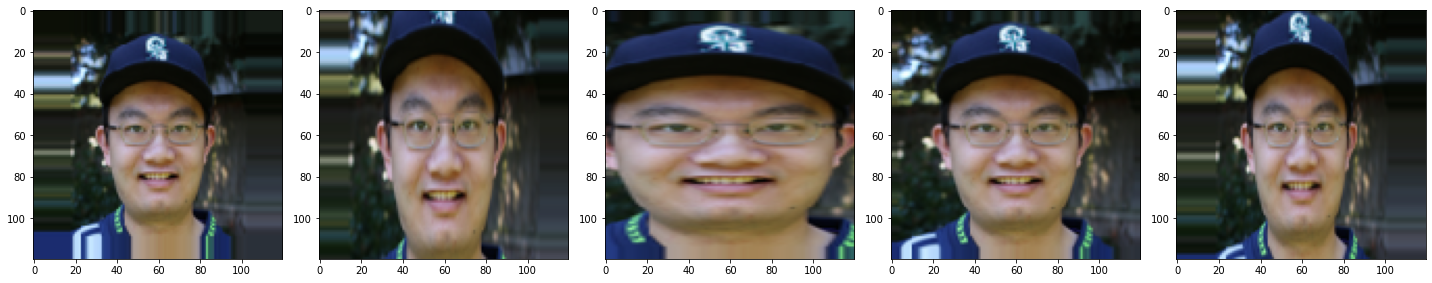

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#Image Generator

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory='/content/Face_Masked_Dataset/Train',
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 3639 images belonging to 2 classes.


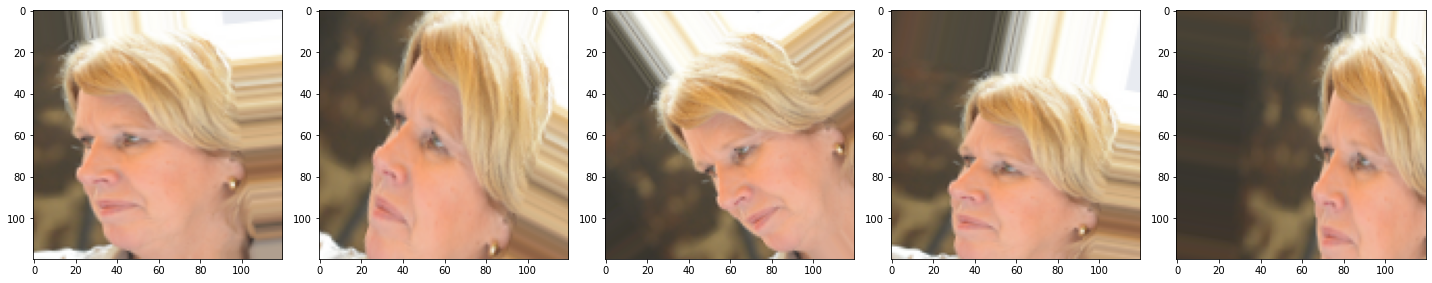

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='/content/Face_Masked_Dataset/validation',
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 604 images belonging to 2 classes.


# Model Creation

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
    #tf.keras.layers.Dense(2, activation='softmax')
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#sigmoid

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)      

In [ ]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
37/37 [==============================] - 42s 1s/step - loss: 0.6054 - accuracy: 0.6950 - val_loss: 0.0909 - val_accuracy: 0.9785
Epoch 2/20
37/37 [==============================] - 41s 1s/step - loss: 0.1772 - accuracy: 0.9333 - val_loss: 0.0779 - val_accuracy: 0.9719
Epoch 3/20
37/37 [==============================] - 41s 1s/step - loss: 0.1568 - accuracy: 0.9440 - val_loss: 0.0584 - val_accuracy: 0.9868
Epoch 4/20
37/37 [==============================] - 41s 1s/step - loss: 0.1223 - accuracy: 0.9537 - val_loss: 0.0461 - val_accuracy: 0.9834
Epoch 5/20
37/37 [==============================] - 41s 1s/step - loss: 0.0893 - accuracy: 0.9710 - val_loss: 0.0479 - val_accuracy: 0.9851
Epoch 6/20
37/37 [==============================] - 41s 1s/step - loss: 0.1049 - accuracy: 0.9669 - val_loss: 0.0798 - val_accuracy: 0.9801
Epoch 7/20
37/37 [==============================] - 41s 1s/step - loss: 0.0963 - accuracy: 0.9674 - val_loss: 0.0446 - val_accuracy: 0.9851
Epoch 8/20
37/37 [==

### Visualizing results of the training

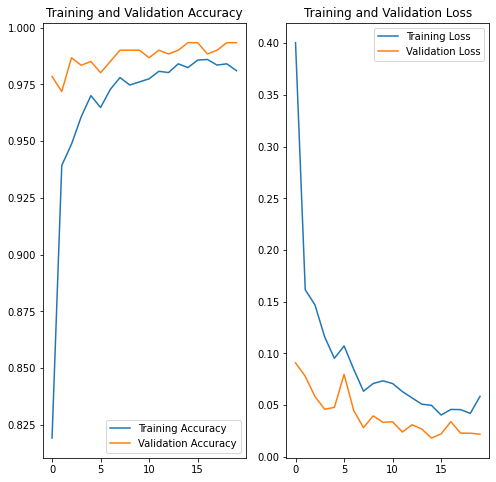

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

#2_Masked Face Classification With Transfer Learning*

### Imports

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from google.colab import files
from keras.preprocessing import image

Now, let's see what the filenames look like in the `Faces` and `Masked Faces` training directories:





In [ ]:
train_faces_names = os.listdir('/content/Face_Masked_Dataset/Train/Faces')
print(train_faces_names[:10])

train_masked_names = os.listdir('/content/Face_Masked_Dataset/Train/Masked')
print(train_masked_names[:10])

validation_faces_hames = os.listdir('/content/Face_Masked_Dataset/validation/Faces')
print(validation_faces_hames[:10])

validation_masked_names = os.listdir('/content/Face_Masked_Dataset/validation/Masked')
print(validation_masked_names[:10])

['01977.png', '01392.png', '01882.png', '01474.png', '00594.png', '01133.png', '00554.png', '00515.png', '00461.png', '00657.png']
['46568_Mask.jpg', '0_0_3-130615133545192.jpg', '46924_Mask.jpg', 'nji (926).jpg', 'sss (33).jpg', 'nji (23).jpg', 'nji (390).jpg', 'nji (121).jpg', 'nji (345).jpg', 'nji (280).jpg']
['00013.png', '00145.png', '00282.png', '00292.png', '00166.png', '00081.png', '00270.png', '00168.png', '00045.png', '00038.png']
['46032_Mask.jpg', '46114_Mask.jpg', '54 (2).jpg', '46096_Mask.jpg', '46041_Mask.jpg', 'zzzz (9).jpg', '46060_Mask.jpg', '46123_Mask.jpg', '46134_Mask.jpg', '46221_Mask.jpg']


Let's find out the total number of faces and masked faces images in the directories:

In [ ]:
# Directory with our training faces pictures
train_faces_dir = os.path.join('/content/Face_Masked_Dataset/Train/Faces')

# Directory with our training masked pictures
train_masked_dir = os.path.join('/content/Face_Masked_Dataset/Train/Masked')

# Directory with our validation faces pictures
valid_faces_dir = os.path.join('/content/Face_Masked_Dataset/validation/Faces')

# Directory with our validation masked pictures
valid_masked_dir = os.path.join('/content/Face_Masked_Dataset/validation/Masked')

In [ ]:
print('total training faces images:', len(os.listdir(train_faces_dir)))
print('total training masked images:', len(os.listdir(train_masked_dir)))
print('total validation faces images:', len(os.listdir(valid_faces_dir)))
print('total validation masked images:', len(os.listdir(valid_masked_dir)))

total training faces images: 1709
total training masked images: 1930
total validation faces images: 304
total validation masked images: 300


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline



# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 faces and 8 masked pictures. You can rerun the cell to see a fresh batch each time:

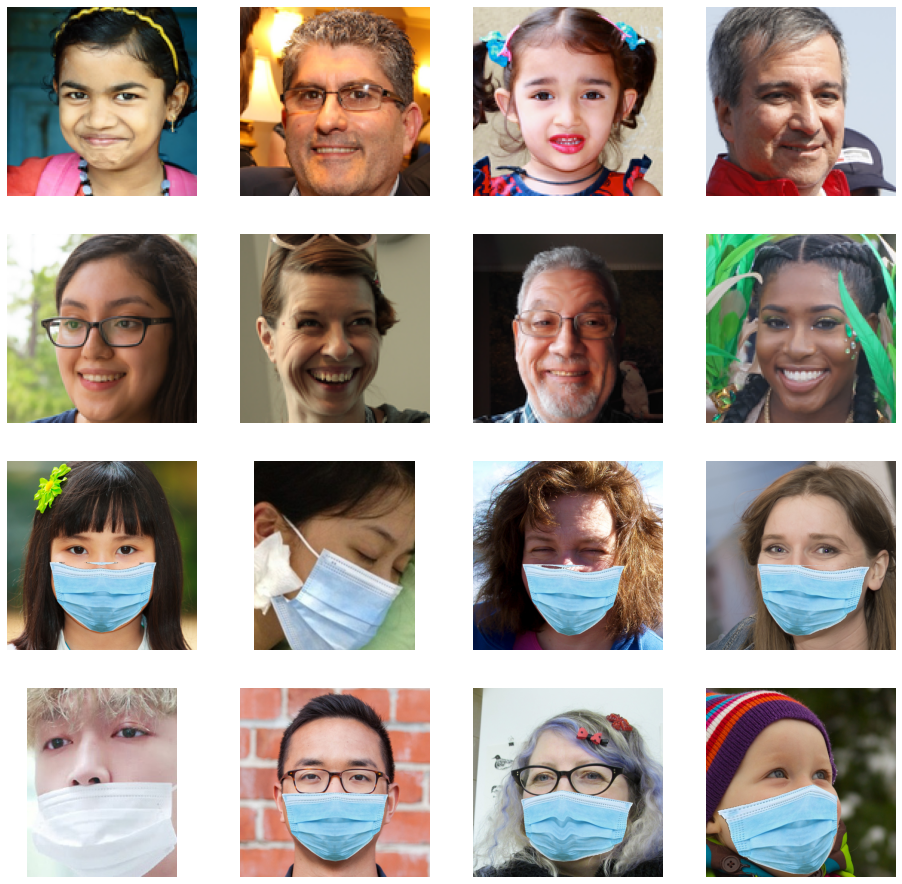

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_faces_pic = [os.path.join(train_faces_dir, fname) 
                for fname in train_faces_names[pic_index-8:pic_index]]
next_masked_pic = [os.path.join(train_masked_dir, fname) 
                for fname in train_masked_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_faces_pic + next_masked_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Now ,let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Face_Masked_Dataset/Train/',  # This is the source directory for training images
        classes = ['Faces', 'Masked'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Face_Masked_Dataset/validation/',  # This is the source directory for training images
        classes = ['Faces', 'Masked'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 3639 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


## Building the Model

But before we continue, let's start defining the model:


Now, let's add the MobileNet model. Make sure that to include the include_top parameter and set to to False. This will subtract the last layer of the model, so that we can add our own layer that we will train on. This is called transfer learning! For that last layer, we will add a Sigmoid layer for binary classification.

In [ ]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False


9412608/9406464 [==============================] - 0s 0us/step


The model.summary() method call prints a summary of the NN 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

### Training
Let's train for 15 epochs -- this may take a few minutes to run.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 2.1541 - accuracy: 0.7492 - val_loss: 0.0203 - val_accuracy: 0.9934
Epoch 2/15
8/8 [==============================] - 7s 855ms/step - loss: 0.0354 - accuracy: 0.9868 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 3/15
8/8 [==============================] - 7s 908ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 8s 953ms/step - loss: 0.0142 - accuracy: 0.9947 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 8s 943ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 8s 962ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 7s 919ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 5.8302e-09 - val_accuracy: 1.0000
Epoch 8/15
8/8 [==

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:

In [ ]:
model.evaluate(validation_generator)

32/32 [==============================] - 4s 142ms/step - loss: 0.0072 - accuracy: 0.9967


[0.0072081987746059895, 0.996688723564148]

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

32/32 [==============================] - 5s 136ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

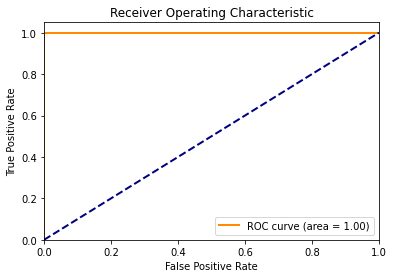

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does much better than chance at classifying between faces and masked faces. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, faces and masked faces. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using full-connected layers and also transfer learning with ResNet!

###Making Predictions

Now, let's use the modlel to make predictions! Upload an image to see if it's a face or masked face.

Saving 1.jpg to 1 (2).jpg
[0.9030596]
1.jpg is a masked face


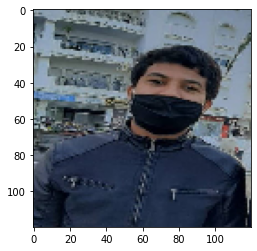

In [ ]:
%matplotlib inline


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(120, 120))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a face")
  else:
    print(fn + " is a masked face")
 

#3_*Male/Female Masked Face Classification With Image Augmentation*

In [ ]:
%cp -R /content/drive/MyDrive/Male_Female_Masked/ /content/

# Importing packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

## Understanding our data

In [ ]:
num_male_tr = len(os.listdir('/content/Male_Female_Masked/Train/Male'))
num_female_tr = len(os.listdir('/content/Male_Female_Masked/Train/Female'))

num_male_val = len(os.listdir('/content/Male_Female_Masked/Validation/Male'))
num_female_val = len(os.listdir('/content/Male_Female_Masked/Validation/Female'))

total_train = num_male_tr + num_female_tr
total_val = num_male_val + num_female_val

In [ ]:
print('total training male images:', num_male_tr)
print('total training female images:', num_female_tr)

print('total validation male images:', num_male_val)
print('total validation female images:', num_female_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training male images: 770
total training female images: 770
total validation male images: 192
total validation female images: 192
--
Total training images: 1540
Total validation images: 384


# Setting Model Parameters

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 120  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Data Preparation 

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='/content/Male_Female_Masked/Train',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(120,120)
                                                           class_mode='binary')

Found 1540 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory='/content/Male_Female_Masked/Validation',
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 384 images belonging to 2 classes.


### Visualizing Training images

In [ ]:
sample_training_images, _ = next(train_data_gen) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

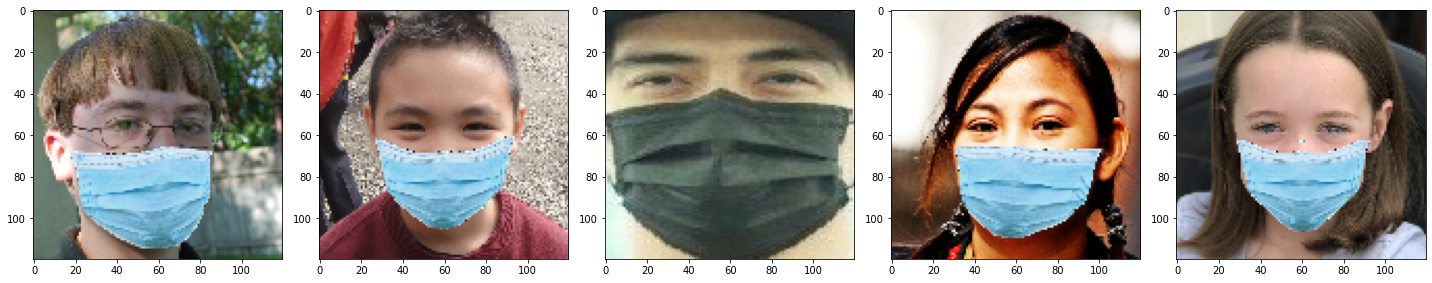

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

#Data Augmentation 

##Flipping

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Male_Female_Masked/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 1540 images belonging to 2 classes.


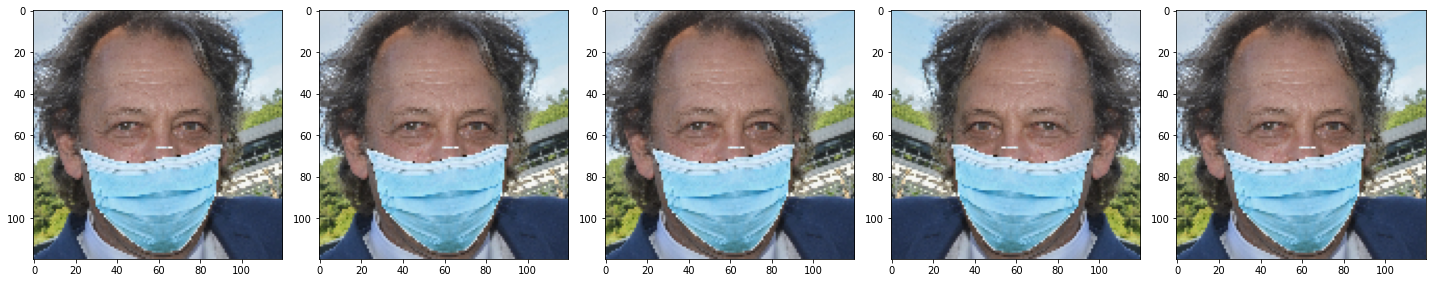

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##Rotation

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Male_Female_Masked/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 1540 images belonging to 2 classes.


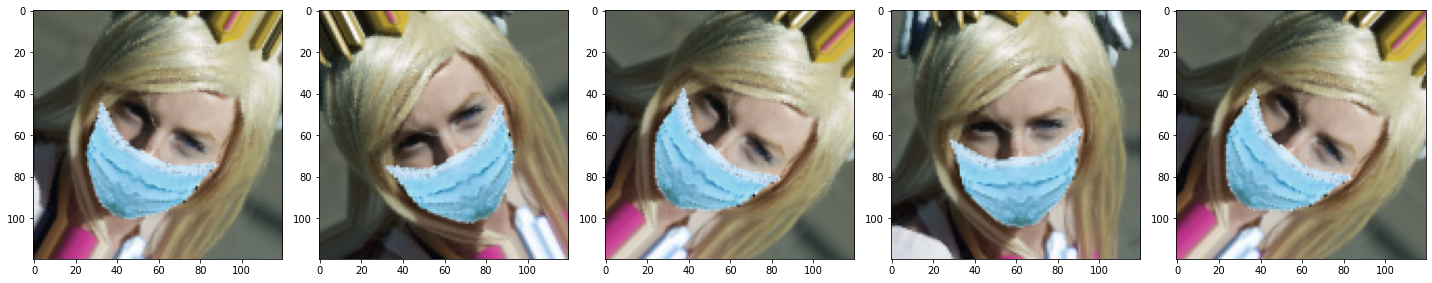

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##Zooming

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Male_Female_Masked/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 1540 images belonging to 2 classes.


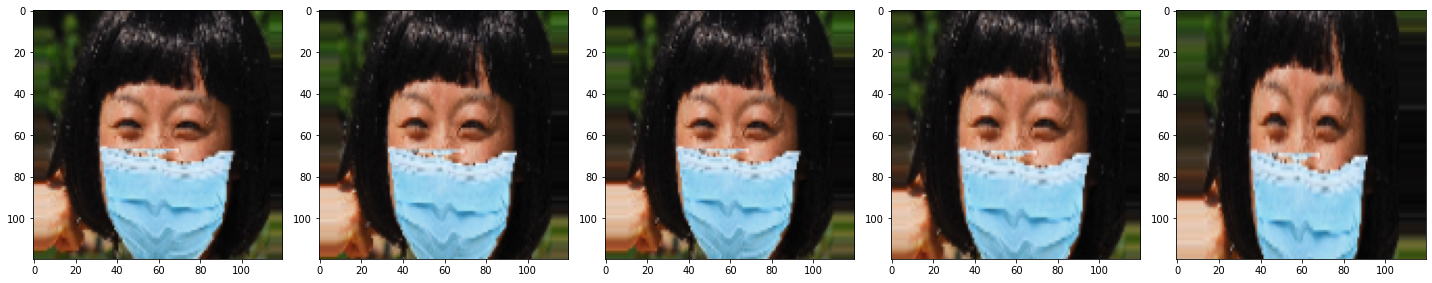

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#Image generator

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory='/content/Male_Female_Masked/Train',
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 1540 images belonging to 2 classes.


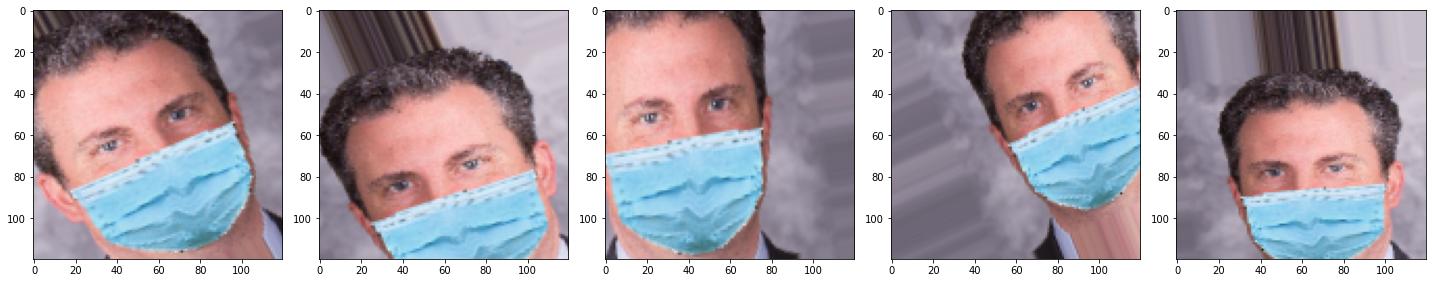

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='/content/Male_Female_Masked/Validation',
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 384 images belonging to 2 classes.


# Model Creation

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
    #tf.keras.layers.Dense(2, activation='softmax')
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#sigmoid

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 128)      

In [ ]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
16/16 [==============================] - 31s 2s/step - loss: 0.7290 - accuracy: 0.5026 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 29s 2s/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6813 - val_accuracy: 0.5911
Epoch 3/20
16/16 [==============================] - 29s 2s/step - loss: 0.6846 - accuracy: 0.5565 - val_loss: 0.6746 - val_accuracy: 0.5651
Epoch 4/20
16/16 [==============================] - 29s 2s/step - loss: 0.6830 - accuracy: 0.5809 - val_loss: 0.6453 - val_accuracy: 0.6380
Epoch 5/20
16/16 [==============================] - 29s 2s/step - loss: 0.6566 - accuracy: 0.6131 - val_loss: 0.6448 - val_accuracy: 0.6380
Epoch 6/20
16/16 [==============================] - 29s 2s/step - loss: 0.6682 - accuracy: 0.5941 - val_loss: 0.6319 - val_accuracy: 0.6797
Epoch 7/20
16/16 [==============================] - 29s 2s/step - loss: 0.6602 - accuracy: 0.6166 - val_loss: 0.6437 - val_accuracy: 0.6302
Epoch 8/20
16/16 [==

### Visualizing results of the training

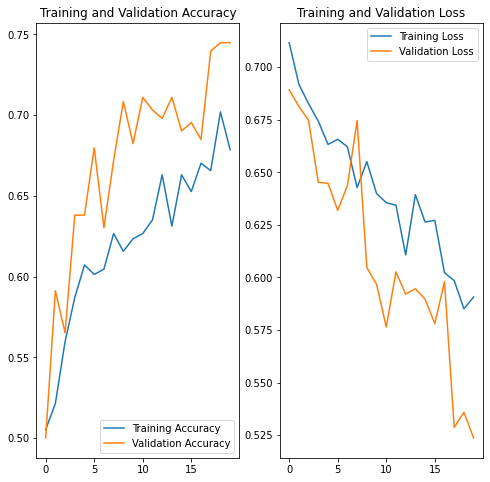

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

#3_*Male/Female Masked Face Classification With Transfer Learning*

Now, let's see what the filenames look like in the `Male` and `Female` masked faces training directories:

In [ ]:
train_male_names = os.listdir('/content/Male_Female_Masked/Train/Male')
print(train_male_names[:10])

train_female_names = os.listdir('/content/Male_Female_Masked/Train/Female')
print(train_female_names[:10])

validation_male_hames = os.listdir('/content/Male_Female_Masked/Validation/Male')
print(validation_male_hames[:10])

validation_female_names = os.listdir('/content/Male_Female_Masked/Validation/Female')
print(validation_female_names[:10])

['sss (33).jpg', 'nji (23).jpg', 'nji (121).jpg', 'nji (620).jpg', 'nji (290).jpg', 'nji (308).jpg', 'nji (445).jpg', 'nji (323).jpg', 'asc (1).jpg', '46953_Mask.jpg']
['46924_Mask.jpg', 'nji (926).jpg', 'nji (390).jpg', 'nji (345).jpg', 'nji (280).jpg', 'nji (77).jpg', '46673_Mask.jpg', 'nji (930).jpg', 'azee (4).jpg', 'gsf (9).jpg']
['46469_Mask.jpg', '46298_Mask.jpg', '54 (2).jpg', '46096_Mask.jpg', '0_0_006vBMIgjw1fabb8ghpxrj30im0cgjt5.jpg', '46060_Mask.jpg', '1_1_9.jpg', '46021_Mask.jpg', '46354_Mask.jpg', '11 (10).jpg']
['46568_Mask.jpg', '0_0_3-130615133545192.jpg', '1_0_13.jpg', '46504_Mask.jpg', '46543_Mask.jpg', '46510_Mask.jpg', '46308_Mask.jpg', '46471_Mask.jpg', '46454_Mask.jpg', '46436_Mask.jpg']


Let's find out the total number of male and female masked images in the directories:

In [ ]:
# Directory with our training male pictures
train_male_dir = os.path.join('/content/Male_Female_Masked/Train/Male')

# Directory with our training female pictures
train_female_dir = os.path.join('/content/Male_Female_Masked/Train/Female')

# Directory with our validation male pictures
valid_male_dir = os.path.join('/content/Male_Female_Masked/Validation/Male')

# Directory with our validation female pictures
valid_female_dir = os.path.join('/content/Male_Female_Masked/Validation/Female')

In [ ]:
print('total training male images:', len(os.listdir(train_male_dir)))
print('total training female images:', len(os.listdir(train_female_dir)))
print('total validation male images:', len(os.listdir(valid_male_dir)))
print('total validation female images:', len(os.listdir(valid_female_dir)))

total training male images: 770
total training female images: 770
total validation male images: 192
total validation female images: 192


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 male and 8 female masked pictures. You can rerun the cell to see a fresh batch each time:

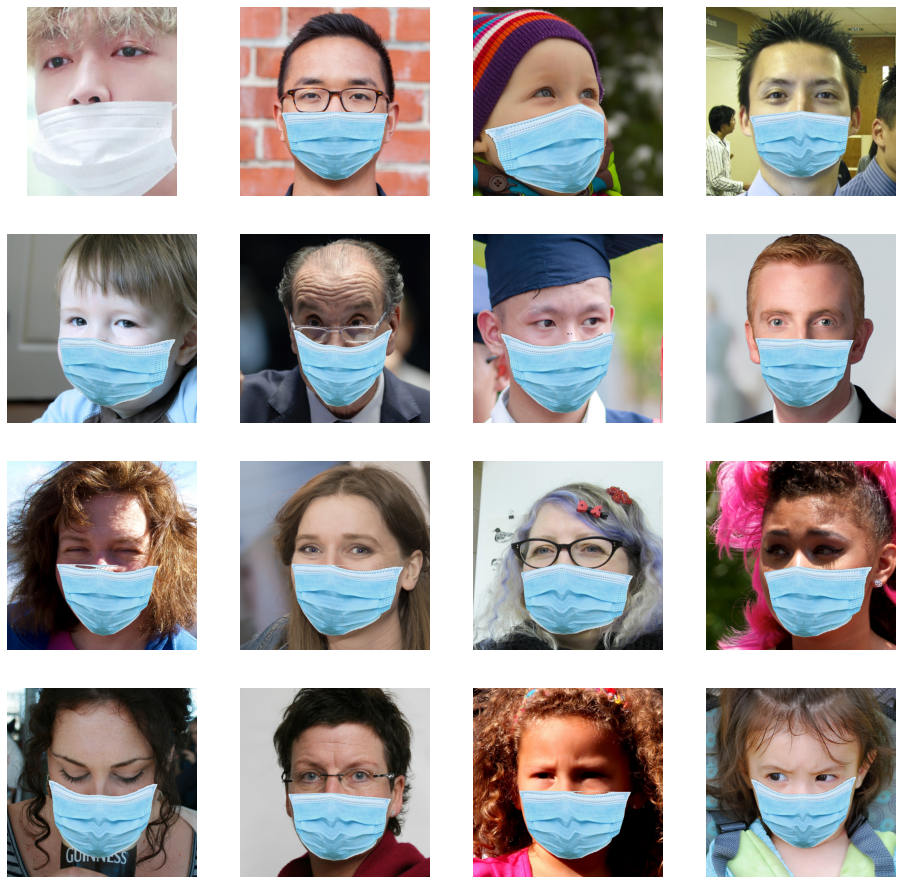

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_male_pic = [os.path.join(train_male_dir, fname) 
                for fname in train_male_names[pic_index-8:pic_index]]
next_female_pic = [os.path.join(train_female_dir, fname) 
                for fname in train_female_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_male_pic + next_female_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Now ,let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Male_Female_Masked/Train/',  # This is the source directory for training images
        classes = ['Male', 'Female'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Male_Female_Masked/Validation/',  # This is the source directory for training images
        classes = ['Male', 'Female'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 1540 images belonging to 2 classes.
Found 384 images belonging to 2 classes.


## Building the Model


Now, let's add the MobileNet model. Make sure that to include the include_top parameter and set to to False. This will subtract the last layer of the model, so that we can add our own layer that we will train on. This is called transfer learning! For that last layer, we will add a Sigmoid layer for binary classification.

In [ ]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False


The model.summary() method call prints a summary of the NN 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
               optimizer=RMSprop(lr=0.001),
               metrics=['accuracy'])

from tensorflow.keras import optimizers


#model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

### Training
Let's train for 15 epochs -- this may take a few minutes to run.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 18s 2s/step - loss: 0.8671 - accuracy: 0.5865 - val_loss: 0.8170 - val_accuracy: 0.5197
Epoch 2/15
8/8 [==============================] - 15s 2s/step - loss: 0.6359 - accuracy: 0.6425 - val_loss: 0.5167 - val_accuracy: 0.7697
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 0.5201 - accuracy: 0.7377 - val_loss: 0.5953 - val_accuracy: 0.6908
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.5244 - accuracy: 0.7427 - val_loss: 0.5497 - val_accuracy: 0.7303
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 0.4923 - accuracy: 0.7496 - val_loss: 0.7049 - val_accuracy: 0.5921
Epoch 6/15
8/8 [==============================] - 15s 2s/step - loss: 0.4729 - accuracy: 0.7801 - val_loss: 0.3782 - val_accuracy: 0.8684
Epoch 7/15
8/8 [==============================] - 15s 2s/step - loss: 0.4733 - accuracy: 0.7665 - val_loss: 0.5211 - val_accuracy: 0.7434
Epoch 8/15
8/8 [==================

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:

In [ ]:
model.evaluate(validation_generator)

21/21 [==============================] - 5s 250ms/step - loss: 0.4701 - accuracy: 0.7604


[0.47010675072669983, 0.7604166865348816]

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

21/21 [==============================] - 6s 248ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

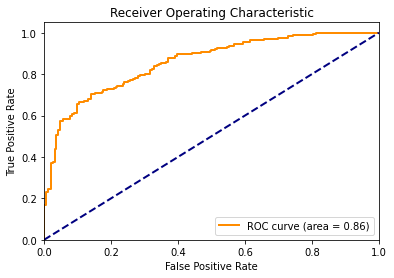

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does much better than chance at classifying between male and female masked. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, male and female. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using full-connected layers and also transfer learning with ResNet!

###Making Predictions

Now, let's use the modlel to make predictions! Upload an image to see if it's a male or female.

Saving 1.jpg to 1 (5).jpg
[0.7258298]
1.jpg is a masked male


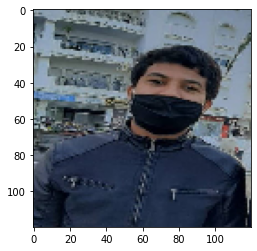

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(120, 120))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.75:
    print(fn + " is a masked male")
  else:
    print(fn + " is a masked female")
 

#5_*Masked Face Recognition with Transfer learning*


#Moving Data

In [ ]:
%cp -R /content/drive/MyDrive/Masked_Face_Recogntion/ /content/

In [ ]:
train_ronaldo_names = os.listdir('/content/Masked_Face_Recogntion/Train/Ronaldo')
print(train_ronaldo_names)

train_neymar_names = os.listdir('/content/Masked_Face_Recogntion/Train/Neymar')
print(train_neymar_names)

train_salah_names = os.listdir('/content/Masked_Face_Recogntion/Train/Salah')
print(train_salah_names)

train_kendall_names = os.listdir('/content/Masked_Face_Recogntion/Train/KendallJenner')
print(train_kendall_names)

train_hailey_names = os.listdir('/content/Masked_Face_Recogntion/Train/HaileyBaldwin')
print(train_hailey_names)

train_serena_names = os.listdir('/content/Masked_Face_Recogntion/Train/SerenaWilliams')
print(train_serena_names)

validation_ronaldo_names = os.listdir('/content/Masked_Face_Recogntion/Validation/Ronaldo')
print(validation_ronaldo_names)

validation_neymar_names = os.listdir('/content/Masked_Face_Recogntion/Validation/Neymar')
print(validation_neymar_names)

validation_salah_names = os.listdir('/content/Masked_Face_Recogntion/Validation/Salah')
print(validation_salah_names)

validation_kendall_names = os.listdir('/content/Masked_Face_Recogntion/Validation/KendallJenner')
print(validation_kendall_names)

validation_hailey_names = os.listdir('/content/Masked_Face_Recogntion/Validation/HaileyBaldwin')
print(validation_hailey_names)

validation_serena_names = os.listdir('/content/Masked_Face_Recogntion/Validation/SerenaWilliams')
print(validation_serena_names)


['320_png_jpg.rf.86ae38a317ab8f16da2b0c7f15bd836c.jpg', 'Ed363drXYAEY98t_png_jpg.rf.6acfa7cebe6da9f9f58dab77ccf631fb.jpg', 'Inkeddownlod_LI-png_png_jpg.rf.4cbb9ad117a9cb2ef053a3301d89a8e3.jpg', '124089126_781753332665876_8406330615420760266_n_png_jpg.rf.a06fd78722feda7a78ab979760cc1f04.jpg', 'Ed363drXYAEY98t_png_jpg.rf.afd507bc3dc4624035e5f1c1fa5980b8.jpg', 'Inkeddownlod_LI-png_png_jpg.rf.a8253871908fc7e02890eceeb36c7b14.jpg', 'Ed363drXYAEY98t_png_jpg.rf.03783d92c58bb10331bcb47bc7323535.jpg', 'download_png_jpg.rf.0fa763203f4c49a5b6006f16574ea156.jpg', '45396_png_jpg.rf.67153d2d34fbc12061eed15119819635.jpg', '320_png_jpg.rf.aef45f5dab260105601e808234dc2d9a.jpg', 'Inkeddownlod_LI-png_png_jpg.rf.bb8dc3afbaae82d5ae16a22b6540abc0.jpg', 'Inkeddownlod_LI-png_png_jpg.rf.9a67926b1bd1b7338ad8816e59f04959.jpg', 'Inkeddownlod_LI-png_png_jpg.rf.b39e1ac45d3f79adff8ebf925ec05e8b.jpg', 'download_png_jpg.rf.302feea8f788c5754bd59f2cc5646d7f.jpg', '124089126_781753332665876_8406330615420760266_n_png_jpg.

Let's find out the total number of images for every person

In [ ]:
# Directory with our training neymar pictures
train_neymar = os.path.join('/content/Masked_Face_Recogntion/Train/Neymar')

# Directory with our training ronaldo pictures
train_ronaldo = os.path.join('/content/Masked_Face_Recogntion/Train/Ronaldo')

# Directory with our training salah pictures
train_salah = os.path.join('/content/Masked_Face_Recogntion/Train/Salah')

# Directory with our training kendall pictures
train_kendall = os.path.join('/content/Masked_Face_Recogntion/Train/KendallJenner')

# Directory with our training hailey pictures
train_hailey = os.path.join('/content/Masked_Face_Recogntion/Train/HaileyBaldwin')

# Directory with our training serena pictures
train_serena = os.path.join('/content/Masked_Face_Recogntion/Train/SerenaWilliams')


# Directory with our valid neymar pictures
valid_neymar = os.path.join('/content/Masked_Face_Recogntion/Validation/Neymar')

# Directory with our valid ronaldo pictures
valid_ronaldo = os.path.join('/content/Masked_Face_Recogntion/Validation/Ronaldo')

# Directory with our valid salah pictures
valid_salah = os.path.join('/content/Masked_Face_Recogntion/Validation/Salah')

# Directory with our valid kendall pictures
valid_kendall = os.path.join('/content/Masked_Face_Recogntion/Validation/KendallJenner')

# Directory with our valid hailey pictures
valid_hailey = os.path.join('/content/Masked_Face_Recogntion/Validation/HaileyBaldwin')

# Directory with our valid serena pictures
valid_serena = os.path.join('/content/Masked_Face_Recogntion/Validation/SerenaWilliams')

In [ ]:
print('total training ronaldo images:', len(os.listdir(train_ronaldo)))
print('total training neymar images:', len(os.listdir(train_neymar)))
print('total training salah images:', len(os.listdir(train_salah)))
print('total training kendall images:', len(os.listdir(train_kendall)))
print('total training hailey images:', len(os.listdir(train_hailey)))
print('total training serena images:', len(os.listdir(train_serena)))
print('----')
print('total validation ronaldo images:', len(os.listdir(valid_ronaldo)))
print('total validation neymar images:', len(os.listdir(valid_neymar)))
print('total validation salah images:', len(os.listdir(valid_salah)))
print('total validation kendall images:', len(os.listdir(valid_kendall)))
print('total validation hailey images:', len(os.listdir(valid_hailey)))
print('total validation serena images:', len(os.listdir(valid_serena)))

total training ronaldo images: 52
total training neymar images: 87
total training salah images: 59
total training kendall images: 81
total training hailey images: 69
total training serena images: 52
----
total validation ronaldo images: 4
total validation neymar images: 5
total validation salah images: 6
total validation kendall images: 20
total validation hailey images: 5
total validation serena images: 4


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

0 /content/Masked_Face_Recogntion/Train/Ronaldo/320_png_jpg.rf.86ae38a317ab8f16da2b0c7f15bd836c.jpg
1 /content/Masked_Face_Recogntion/Train/Ronaldo/Ed363drXYAEY98t_png_jpg.rf.6acfa7cebe6da9f9f58dab77ccf631fb.jpg
2 /content/Masked_Face_Recogntion/Train/Ronaldo/Inkeddownlod_LI-png_png_jpg.rf.4cbb9ad117a9cb2ef053a3301d89a8e3.jpg
3 /content/Masked_Face_Recogntion/Train/Ronaldo/124089126_781753332665876_8406330615420760266_n_png_jpg.rf.a06fd78722feda7a78ab979760cc1f04.jpg
4 /content/Masked_Face_Recogntion/Train/Neymar/neymar-mascarilla_png_jpg.rf.7ff0bd20a3c852df3d62307a16eda393.jpg
5 /content/Masked_Face_Recogntion/Train/Neymar/opoyi_h9M-85zfI_png_jpg.rf.963f14560cae873598bbbfb8627a717c.jpg
6 /content/Masked_Face_Recogntion/Train/Neymar/neymar-mascarilla_png_jpg.rf.e71221fee25f34848c6b057c13eaa2b7.jpg
7 /content/Masked_Face_Recogntion/Train/Neymar/psg-training-session-saint-germain-en-laye-paris-france-shutterstock-editorial-10693103b_png_jpg.rf.5dbec7d78ff8f14235f3118afe455bb7.jpg


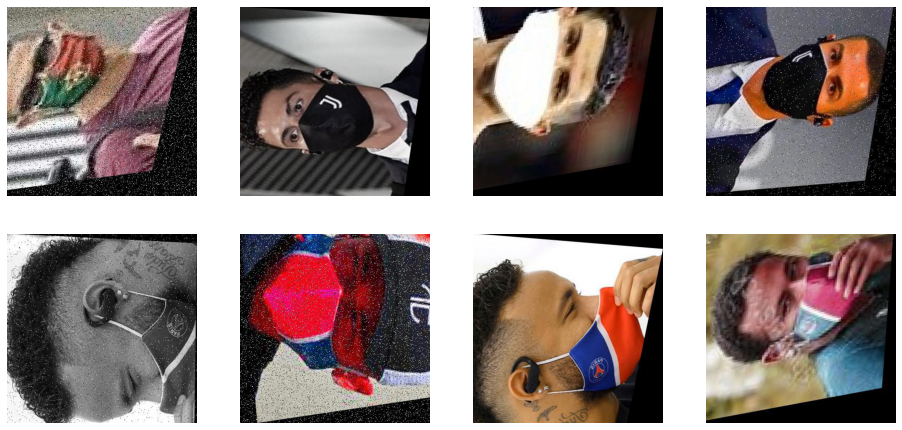

In [ ]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_ronaldo_pic = [os.path.join(train_ronaldo, fname) 
                for fname in train_ronaldo_names[pic_index-4:pic_index]]
next_neymar_pic = [os.path.join(train_neymar, fname) 
                for fname in train_neymar_names[pic_index-4:pic_index]]
next_salah_pic = [os.path.join(train_salah, fname) 
                for fname in train_salah_names[pic_index-4:pic_index]]
next_kendall_pic = [os.path.join(train_kendall, fname) 
                for fname in train_kendall_names[pic_index-4:pic_index]]
next_hailey_pic = [os.path.join(train_hailey, fname) 
                for fname in train_hailey_names[pic_index-4:pic_index]]
next_serena_pic = [os.path.join(train_hailey, fname) 
                for fname in train_hailey_names[pic_index-4:pic_index]]
for i, img_path in enumerate(next_ronaldo_pic + next_neymar_pic):
  print(i,img_path)
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Now ,let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Masked_Face_Recogntion/Train/',  # This is the source directory for training images
        classes = ['Ronaldo', 'Neymar','Salah','SerenaWilliams','KendallJenner','HaileyBaldwin'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=1,
        # Use binary labels
        class_mode='categorical')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Masked_Face_Recogntion/Validation/',  # This is the source directory for training images
        classes = ['Ronaldo', 'Neymar','Salah','SerenaWilliams','KendallJenner','HaileyBaldwin'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=1,
        # Use binary labels
        class_mode='categorical',
        shuffle=True)

Found 400 images belonging to 6 classes.
Found 44 images belonging to 6 classes.


## Building the Model


Now, let's add the MobileNet model. Make sure that to include the include_top parameter and set to to False. This will subtract the last layer of the model, so that we can add our own layer that we will train on. This is called transfer learning! For that last layer, we will add a Sigmoid layer for binary classification.

In [ ]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(6, activation = 'softmax'))
model.layers[0].trainable = False


The model.summary() method call prints a summary of the NN 

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(lr=0.001),
               metrics=['accuracy'])

from tensorflow.keras import optimizers


#model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

### Training


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/30
50/50 [==============================] - 3s 27ms/step - loss: 3.6450 - accuracy: 0.2213 - val_loss: 1.9546 - val_accuracy: 0.3750
Epoch 2/30
50/50 [==============================] - 0s 9ms/step - loss: 2.6057 - accuracy: 0.2067 - val_loss: 2.4669 - val_accuracy: 0.1250
Epoch 3/30
50/50 [==============================] - 0s 9ms/step - loss: 2.2704 - accuracy: 0.3065 - val_loss: 1.5610 - val_accuracy: 0.6250
Epoch 4/30
50/50 [==============================] - 0s 9ms/step - loss: 1.7603 - accuracy: 0.5134 - val_loss: 2.1983 - val_accuracy: 0.1250
Epoch 5/30
50/50 [==============================] - 0s 9ms/step - loss: 1.2837 - accuracy: 0.4738 - val_loss: 0.7828 - val_accuracy: 0.8750
Epoch 6/30
50/50 [==============================] - 0s 9ms/step - loss: 1.4728 - accuracy: 0.5846 - val_loss: 1.3056 - val_accuracy: 0.5000
Epoch 7/30
50/50 [==============================] - 0s 9ms/step - loss: 1.6016 - accuracy: 0.4514 - val_loss: 1.5397 - val_accuracy: 0.3750
Epoch 8/30
50/50 [=

## Accuracy

Let's evaluate the accuracy of our model:

In [ ]:
model.evaluate(validation_generator)

44/44 [==============================] - 0s 7ms/step - loss: 0.7538 - accuracy: 0.7727


[0.7537699341773987, 0.7727272510528564]

#Visualization

R1.png is a masked KendallJenner


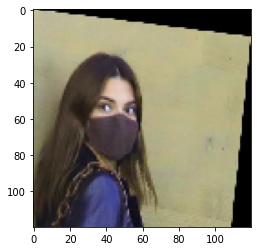

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image


x_batch, y_batch = validation_generator.next()
img = x_batch[0]
plt.imshow(img)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
classes = model.predict(images, batch_size=1)
x = np.argmax(classes, axis = 1)
if x[0] == 0:
  print(fn + " is a masked Ronaldo")
elif x == 1:
  print(fn + " is a masked Neymar")
elif x == 2:
  print(fn + " is a masked Salah")
elif x == 3:
  print(fn + " is a masked SerenaWilliams")
elif x == 4:
  print(fn + " is a masked KendallJenner")
elif x == 5:
  print(fn + " is a masked HaileyBaldwin")
    